In [1]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-08-30 16:14:05,560][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-08-30 16:14:06,719][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
animals = ["R013", "R014", "R015"]

df = create_trials_df_from_dj(animal_ids=animals)

df = df.query("stage > 8").copy()

fetched 39 sessions for R013 between 2023-07-14 and 2023-08-30
fetched 39 sessions for R014 between 2023-07-14 and 2023-08-30
fetched 39 sessions for R015 between 2023-07-14 and 2023-08-30


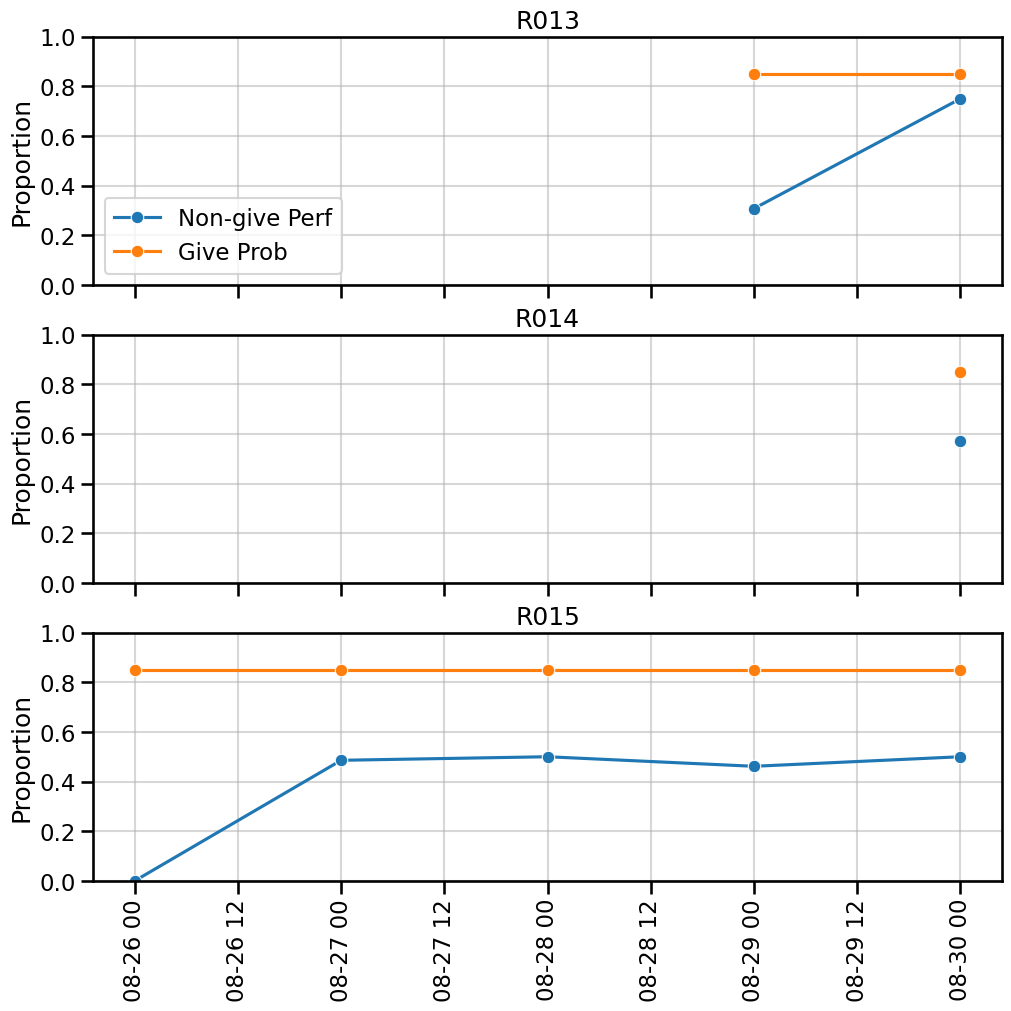

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10), constrained_layout=True, sharex=True)
for ii, (animal, sub_df) in enumerate(df.groupby("animal_id")):
    legend = False if ii != 0 else True

    plot_non_give_performance(sub_df, ax=ax[ii], title=animal, legend=legend)

_ = plt.xticks(rotation=90)